<a href="https://colab.research.google.com/github/badrinarayanan02/Computer-Vision/blob/main/2348507_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Denoising**

1. Read the original image and include the noise in the original image
2. Use appropriate filtering techniques to restore the image

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

# Gaussian Noise

In [20]:
def addGaussianNoise(image, mean=0, var=0.01):
    row, col, ch = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch)).reshape(row, col, ch)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # valid pixel range
    return noisy_image.astype(np.uint8)

In [21]:
image = cv2.imread('/content/IMG_20240414_185432.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

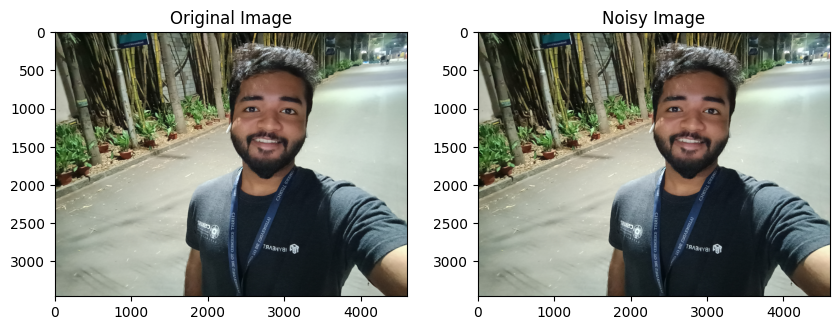

In [22]:
noisy_image = addGaussianNoise(image,mean=0, var=0.05)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.show()

Visualizing the histogram and spectrum to check the changes

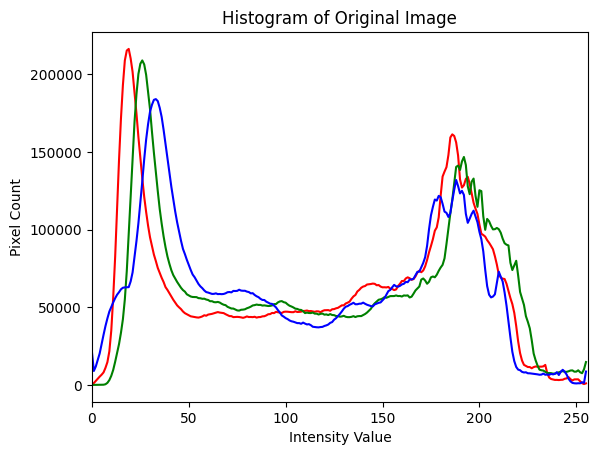

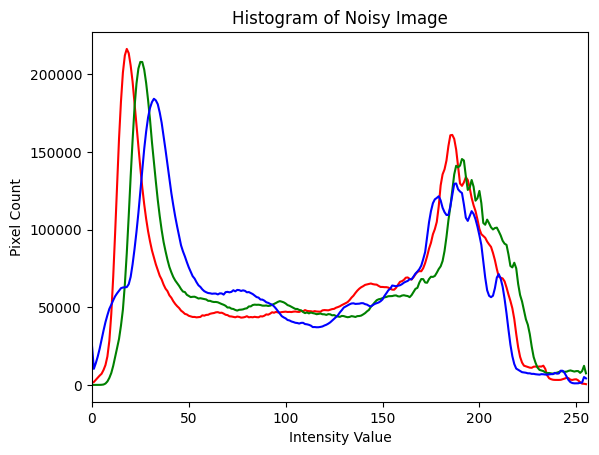

In [23]:
def plotHistogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

plotHistogram(image, 'Histogram of Original Image')

noisy_image = addGaussianNoise(image)

plotHistogram(noisy_image, 'Histogram of Noisy Image')
plt.show()

**Inference**

Histogram analysis is performed separately for each color channel to show the distribution across all channels.

While witnessing the histogram, both the normal image and noisy image are almost similar.

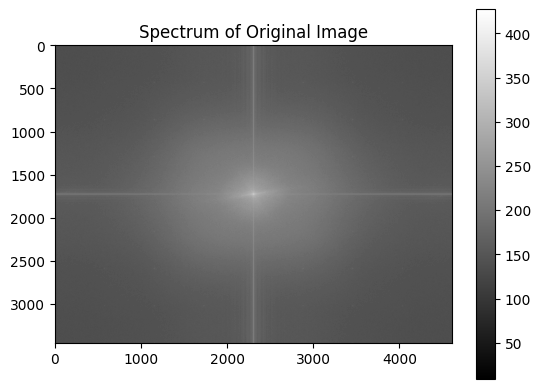

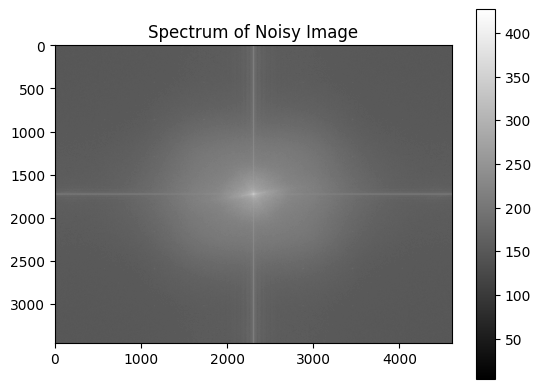

In [24]:
def plotSpectrum(image, title):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.colorbar()

image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plotSpectrum(image_gray, 'Spectrum of Original Image')

noisy_image_gray = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)
plotSpectrum(noisy_image_gray, 'Spectrum of Noisy Image')

plt.show()

**Inference**

The spectrum analysis computes the logarithmic magnitude spectrum, which helps in visualizing the spread and intensity of frequencies more clearly.

If the image has noise then the spectrum will appear overall brighter, here the same case is happening. By visualizing it we can conclude that we added some gaussian noise to the image.

#  Median Filter - Denoising

In [27]:
medianFilter = cv2.medianBlur(noisy_image, 5)

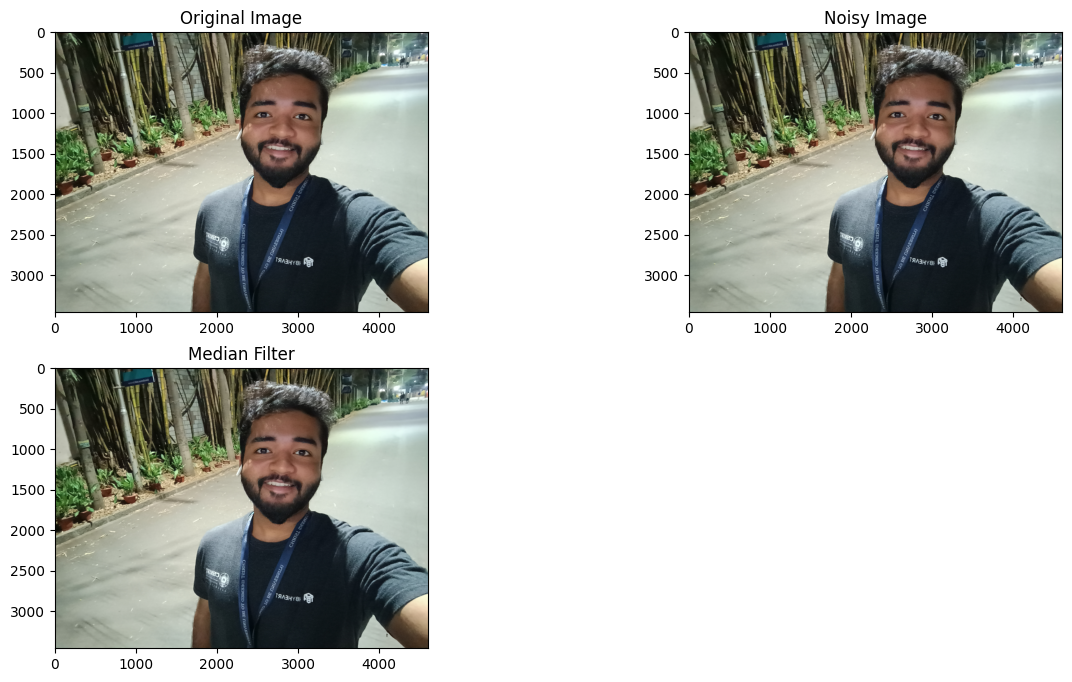

In [28]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(2,2,2)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.subplot(2,2,3)
plt.title('Median Filter')
plt.imshow(medianFilter)
plt.show()

Evaluation Metrics

In [41]:
psnr_value = psnr(image, medianFilter)

print("PSNR: {:.2f}".format(psnr_value))

PSNR: 40.90


**Inference**

The Peak Signal-to-Noise Ratio (PSNR) is usedin image processing to measure the quality of a reconstructed or denoised image compared to its original form.

PSNR of 40.90 dB in rhe denoised image suggests that the median filter was quite effective in reducing noise while preserving the quality and integrity of the original image, leading to minimal perceptible differences between the original and the denoised version.

# Salt & Pepper Noise

In [56]:
def addSaltPepperNoise(image, salt_vs_pepper=0.5, amount=0.004):
    row, col, ch = image.shape
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    coords = [np.random.randint(0, i - 1, int(num_salt)) # salt noise
              for i in image.shape]
    image[coords[0], coords[1], :] = 1

    coords = [np.random.randint(0, i - 1, int(num_pepper)) # pepper noise
              for i in image.shape]
    image[coords[0], coords[1], :] = 0

    return image

In [57]:
image = cv2.imread('/content/florian_lehmuth_flickr1-mr.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

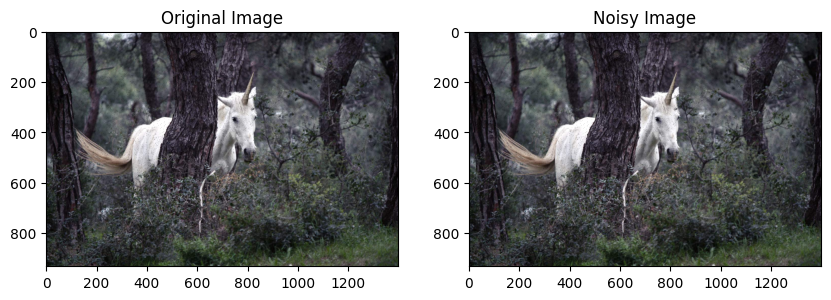

In [58]:
noisy_image2 = addSaltPepperNoise(image)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('Noisy Image')
plt.imshow(noisy_image2)
plt.show()

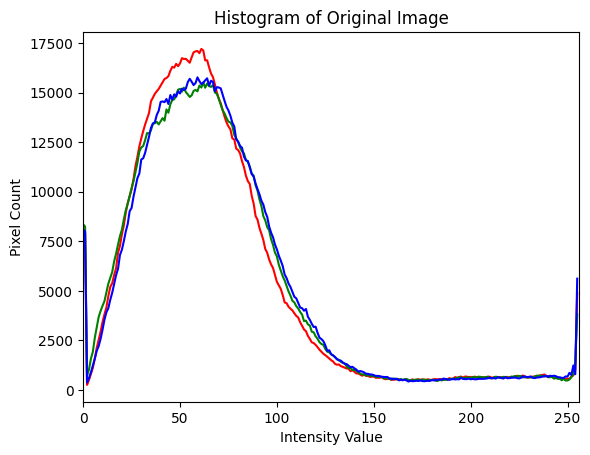

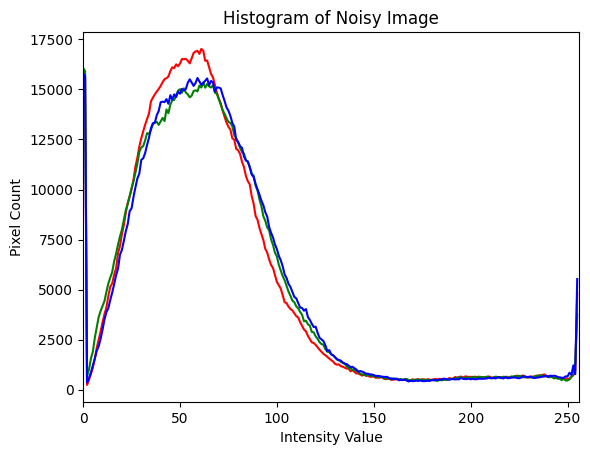

In [59]:
def plotHistogram(image, title):
    plt.figure()
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    colors = ('r', 'g', 'b')
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

plotHistogram(image, 'Histogram of Original Image')

noisy_image2 = addSaltPepperNoise(image)

plotHistogram(noisy_image2, 'Histogram of Noisy Image')
plt.show()

**Inference**

While witnessing the histogram, both the normal image and noisy image are almost similar.

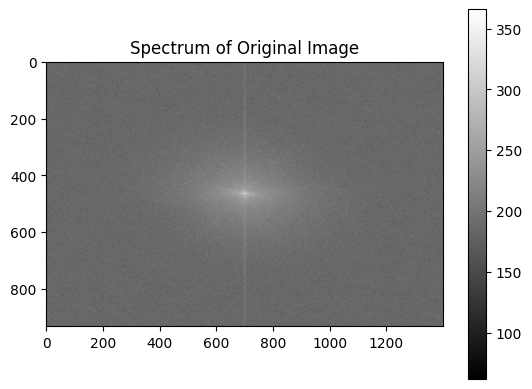

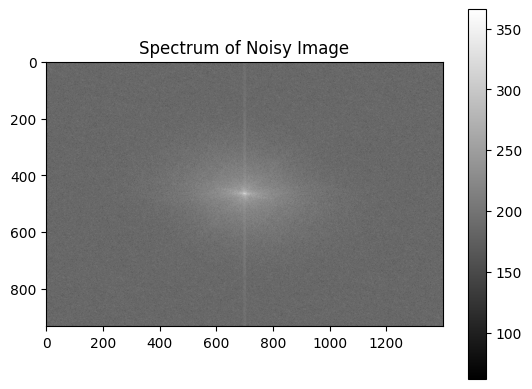

In [60]:
def plotSpectrum(image, title):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    plt.figure()
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.colorbar()

image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plotSpectrum(image_gray, 'Spectrum of Original Image')

noisy_image_gray = cv2.cvtColor(noisy_image2, cv2.COLOR_RGB2GRAY)
plotSpectrum(noisy_image_gray, 'Spectrum of Noisy Image')

plt.show()

**Inference**

The spectrum analysis in noise image is brighter when compared to the spectrum in original image. This shows that we added a salt and pepper noise in the image.

# Median Filter - Denoising (Since it's suitable)

In [64]:
medianFilter2 = cv2.medianBlur(noisy_image2, 5)

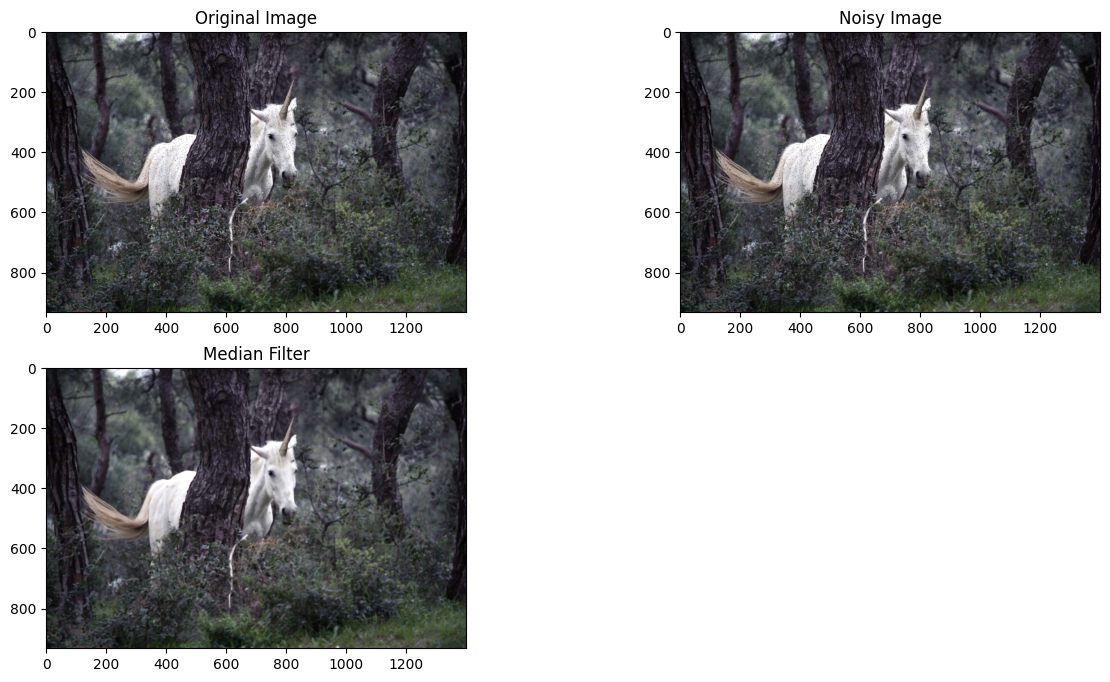

In [65]:
plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(2,2,2)
plt.title('Noisy Image')
plt.imshow(noisy_image2)
plt.subplot(2,2,3)
plt.title('Median Filter')
plt.imshow(medianFilter)
plt.show()

Evaluation Metrics

In [66]:
psnr_value = psnr(image, medianFilter)

print("PSNR: {:.2f}".format(psnr_value))

PSNR: 25.26


**Inference**

PSNR value of 25 dB indicates a moderate level of degradation. Because of the salt and pepper noise, the psnr values got decreased.

# **Conclusion**

Thus the task to perform denosing using suitable filters for each noises has been implemented successfully. Added salt and pepper noise, gaussian noise for different images. Performed denoising using median filter since it's good for these kind of process. Evaluated using the psnr metrics, to check after denoising it is looking similar with the original image.